# PyTorch Beginner's Guide

Welcome to this beginner-friendly PyTorch tutorial! 🎉

In this notebook, you'll learn:
- What tensors are and how to work with them
- Basic tensor operations
- How to build your first neural network
- How to train a model to make predictions

**Prerequisites:**
- Basic Python knowledge
- Understanding of basic math (no advanced calculus required!)

Let's start by importing PyTorch!

In [127]:
# Import PyTorch library
import torch

print(f"PyTorch version: {torch.__version__}")

PyTorch version: 2.0.0.dev20230227


## Part 1: Understanding Tensors

**What is a tensor?** 

Think of a tensor as a fancy word for a multi-dimensional array of numbers. It's like a container that can hold:
- A single number (scalar)
- A list of numbers (vector)
- A table of numbers (matrix)
- Even more complex structures!

Let's explore the different types, starting from the simplest.

### 1.1 Scalar (0-dimensional tensor)

A **scalar** is just a single number - like the number 7 or 3.14.

**Think of it as:** A single value, like your age or temperature.

In [128]:
# Create a scalar (a single number)
scalar = torch.tensor(7)

print(f"Scalar value: {scalar}")
print(f"Scalar as a number: {scalar.item()}")  # .item() extracts the actual number
print(f"Number of dimensions: {scalar.ndim}")
print(f"Shape: {scalar.shape}")  # Shape is empty because it has no dimensions

Scalar value: 7
Scalar as a number: 7
Number of dimensions: 0
Shape: torch.Size([])


### 1.2 Vector (1-dimensional tensor)

A **vector** is a list of numbers arranged in a line.

**Think of it as:** A shopping list [milk, eggs, bread] or coordinates [x, y].

In [129]:
# Create a vector (a list of numbers)
vector = torch.tensor([7, 8])

print(f"Vector: {vector}")
print(f"Number of dimensions: {vector.ndim}")
print(f"Shape: {vector.shape}")  # Shape [2] means it has 2 elements

Vector: tensor([7, 8])
Number of dimensions: 1
Shape: torch.Size([2])


### 1.3 Matrix (2-dimensional tensor)

A **matrix** is a 2D grid of numbers - like a spreadsheet or table.

**Think of it as:** A chessboard with numbers, or an Excel spreadsheet.

Matrix multiplication is the "secret sauce" behind almost everything in AI. If you think of a neural network as a giant calculator, matrix multiplication is the actual math happening inside.

Here is the "dummies" guide to making sense of those rules.

---

## 1. Think of Matrices as "Grids"

A matrix is just a grid of numbers. We describe its size (shape) as **(Rows × Columns)**.

* A **(3, 2)** matrix has 3 rows and 2 columns.
* A **(2, 3)** matrix has 2 rows and 3 columns.

---

## 2. Rule #1: The "Handshake" (Inner Dimensions)

For two matrices to multiply, they have to "fit" together. The rule says the **inner numbers** must be identical.

Imagine two matrices sitting side-by-side:  and .
The  and  are the **inner dimensions**. They must be the same number, or the math physically cannot happen.

* ❌ **(3, 2) @ (3, 2):** The inner numbers are **2** and **3**. They don't match. It’s like trying to plug a USB cable into a headphone jack.
* ✅ **(2, 3) @ (3, 2):** The inner numbers are **3** and **3**. It’s a perfect match!

---

## 3. Rule #2: The "Leftovers" (Outer Dimensions)

Once you know the matrices *can* multiply, you need to know how big the resulting "baby" matrix will be. This is determined by the **outer numbers**.

If you multiply **(2, 3)** and **(3, 2)**:

1. The **3s** (inner) disappear because they were just used to "connect" the matrices.
2. The **2** and **2** (outer) remain.
3. **Result:** A **(2, 2)** matrix.

---

## Why does this matter for AI?

In a library like **PyTorch**, `torch.matmul()` is how the computer passes information through layers of a neural network.

* The **Rows** usually represent "How many items am I looking at?" (e.g., 3 images).
* The **Columns** represent "How many features does each item have?" (e.g., 2 pixels).

If your dimensions don't match, PyTorch will give you a "RuntimeError," which is just a fancy way of saying, "Your grids don't line up!"


### 1.4 Higher-Dimensional Tensors

Tensors can have 3, 4, or even more dimensions! These are used for more complex data like images or videos.

**Think of it as:** A stack of matrices, or a cube of numbers.

In [130]:
# Create a 3D tensor (think of it as a stack of matrices)
tensor = torch.tensor([[[1, 2, 3],
                        [4, 5, 6]],
                       [[7, 8, 9],
                        [10, 11, 12]]])

print(f"3D Tensor:\n{tensor}")
print(f"Number of dimensions: {tensor.ndim}")
print(f"Shape: {tensor.shape}")  # Shape [2, 2, 3] means 2 stacks, each with 2 rows and 3 columns

3D Tensor:
tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])
Number of dimensions: 3
Shape: torch.Size([2, 2, 3])


### Summary: Types of Tensors

| Type | What is it? | Dimensions | Example Use Case |
|------|-------------|------------|------------------|
| **Scalar** | A single number | 0 | Temperature, age |
| **Vector** | A list of numbers | 1 | Coordinates [x, y] |
| **Matrix** | A 2D grid of numbers | 2 | Spreadsheet, image |
| **Tensor** | Multi-dimensional array | 3+ | Video, batch of images |

Remember: In PyTorch, everything is a tensor! Even a single number is a 0-dimensional tensor.

In [131]:
## Part 2: Tensor Operations

Now that you understand what tensors are, let's learn how to work with them! PyTorch makes it easy to perform math operations on tensors.

SyntaxError: invalid syntax (<ipython-input-131-5634f177ae71>, line 3)

### 2.1 Basic Arithmetic Operations

You can add, subtract, multiply, and divide tensors just like regular numbers! PyTorch automatically applies the operation to each element.

In [ ]:
# Create a simple tensor
tensor = torch.tensor([1, 2, 3])

print(f"Original tensor: {tensor}")
print(f"\nAdd 10 to each element: {tensor + 10}")
print(f"Multiply each element by 10: {tensor * 10}")
print(f"Divide each element by 2: {tensor / 2}")
print(f"Subtract 1 from each element: {tensor - 1}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


### 2.2 Element-wise vs Matrix Multiplication

There are two different ways to multiply tensors:

1. **Element-wise multiplication** (`*`): Multiplies each corresponding element
2. **Matrix multiplication** (`@` or `torch.matmul()`): Performs actual matrix math

Let's see the difference!

In [ ]:
# Example 1: Element-wise multiplication
tensor = torch.tensor([1, 2, 3])

print(f"Tensor: {tensor}")
print(f"Element-wise multiplication (tensor * tensor): {tensor * tensor}")
print(f"This multiplies 1*1, 2*2, 3*3 = [1, 4, 9]")

# Example 2: Matrix multiplication (dot product for 1D tensors)
print(f"\nMatrix multiplication (torch.matmul(tensor, tensor)): {torch.matmul(tensor, tensor)}")
print(f"This calculates 1*1 + 2*2 + 3*3 = 14")


Using device: mps
tensor([1, 2, 3], device='mps:0')


In [ ]:
### 2.3 Matrix Multiplication Explained Simply

**Matrix multiplication** is the core operation in neural networks! Here's a simple way to understand it:

**The Rule:** Two matrices can multiply only if the inner dimensions match.
- Matrix A shape: (rows, columns) = (2, 3)
- Matrix B shape: (rows, columns) = (3, 2)  
- Can they multiply? ✅ Yes! The inner dimensions (3 and 3) match!

**Result shape:** The outer dimensions become the result shape
- (2, 3) @ (3, 2) = (2, 2) ← The inner 3s disappear!

Let's see it in action:

torch.Size([7, 7])

# Create two matrices
tensor_A = torch.tensor([[1., 2.],      # Shape: [3, 2] - 3 rows, 2 columns
                         [3., 4.],
                         [5., 6.]])

tensor_B = torch.tensor([[7., 10.],     # Shape: [3, 2] - 3 rows, 2 columns
                         [8., 11.],
                         [9., 12.]])

print("Original shapes:")
print(f"tensor_A: {tensor_A.shape}")
print(f"tensor_B: {tensor_B.shape}")
print(f"\nCan we multiply them directly? NO! Inner dimensions don't match (2 ≠ 3)")

# We need to transpose tensor_B to make inner dimensions match
print(f"\nAfter transposing tensor_B:")
print(f"tensor_B.T shape: {tensor_B.T.shape}")  # T means transpose (swap rows and columns)
print(f"\nNow (3, 2) @ (2, 3) = (3, 3) ✅ Inner dimensions match!")

# Perform matrix multiplication
output = torch.matmul(tensor_A, tensor_B.T)
print(f"\nResult shape: {output.shape}")
print(f"Result:\n{output}")

In [84]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.0.dev20230227'

In [85]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [86]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [87]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

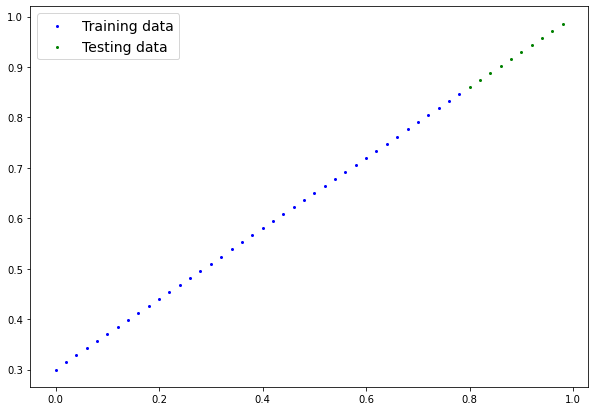

In [88]:
plot_predictions();

Building a neural network in PyTorch is like building a **Lego castle**. You have different sets of bricks and instructions that tell the bricks how to fit together.

Here is the breakdown of the "Essential Four" and how they work together:

---

## 1. `torch.nn` (The Box of Bricks)

Think of this as the master box containing every type of Lego piece you need. It contains pre-made layers (like `nn.Linear` for straight lines) and mathematical functions. If it’s a "thing" in a neural network, it’s probably inside `torch.nn`.

## 2. `nn.Module` (The Blueprint)

This is the "Base Class." In dummy terms, it’s the **instruction manual** you write for your castle.

* When you create a model, you tell PyTorch: *"This is a subclass of `nn.Module`."* * This tells PyTorch to treat your code as a neural network so it can handle all the heavy math behind the scenes.

## 3. `forward()` (The Assembly Line)

Every `nn.Module` needs a `forward()` function. This is simply the **pathway** the data takes.

* It defines exactly what happens to your data from the moment it enters the model until it comes out as a prediction.
* **Analogy:** "Take the input data, multiply it by , add , and give me the result."

---

## 4. `nn.Parameter` (The Knobs and Dials)

These are the tiny "weights" and "biases" inside your model.

* **The Magic:** When you set `requires_grad=True`, PyTorch starts a "GPS" for these numbers. It tracks every calculation so it knows exactly how to change these numbers later to make the model smarter.
* These are the "memories" the model develops as it learns.

## 5. `torch.optim` (The Personal Trainer)

The **Optimizer** is the part that actually improves the model.

* Once the model makes a mistake, the Optimizer looks at the `nn.Parameter` values and says: *"Hey, if we turn this knob a little to the left, the error will go down."*
* It uses **Gradient Descent** (a fancy way of saying "walking downhill toward the right answer").

---

### Summary Table for Quick Reference

| Component | What it is | Real-world Analogy |
| --- | --- | --- |
| **`nn.Module`** | The Model Wrapper | The Lego instruction manual |
| **`nn.Parameter`** | Weights & Biases | The tiny adjustment knobs |
| **`forward()`** | The logic/pathway | The conveyor belt moving data |
| **`torch.optim`** | The Optimizer | The coach telling you how to fix errors |

---


In [89]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [90]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [91]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [92]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [93]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


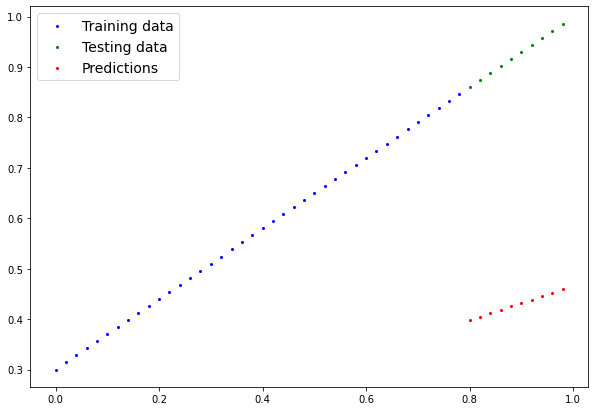

In [94]:
plot_predictions(predictions=y_preds)

In [95]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [96]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788740023970604 | MAE Test Loss: 0.06473556160926819 


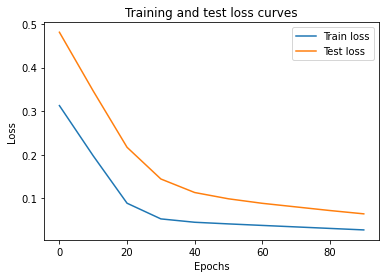

In [97]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [98]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

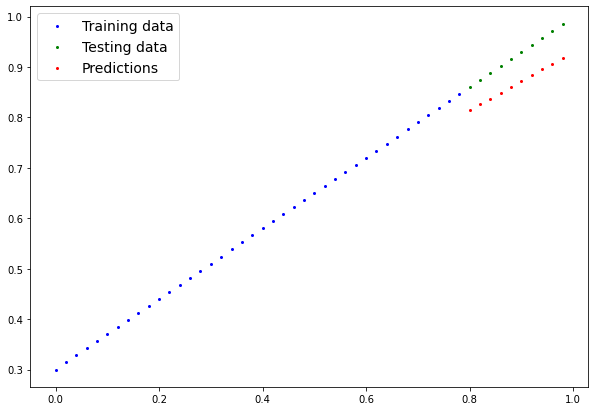

In [99]:
plot_predictions(predictions=y_preds)

## Architecture of a Classification Neural Network

Before jumping into code, let's outline the typical architecture of a classification neural network:

| Hyperparameter                    | Binary Classification                                                        | Multiclass Classification                                      |
|------------------------------------|------------------------------------------------------------------------------|---------------------------------------------------------------|
| **Input layer shape (in_features)**| Same as number of features (e.g., 5 for age, sex, height, weight, smoking)   | Same as binary classification                                 |
| **Hidden layer(s)**                | Problem specific, minimum = 1, maximum = unlimited                           | Same as binary classification                                 |
| **Neurons per hidden layer**       | Problem specific, generally 10 to 512                                         | Same as binary classification                                 |
| **Output layer shape (out_features)**| 1 (represents one class or the other)                                      | 1 per class (e.g., 3 for food, person, or dog photo)          |
| **Hidden layer activation**        | Usually ReLU (Rectified Linear Unit), but can be others                       | Same as binary classification                                 |
| **Output activation**              | Sigmoid (`torch.sigmoid` in PyTorch)                                          | Softmax (`torch.softmax` in PyTorch)                          |
| **Loss function**                  | Binary cross-entropy (`torch.nn.BCELoss` in PyTorch)                          | Cross-entropy (`torch.nn.CrossEntropyLoss` in PyTorch)        |
| **Optimizer**                      | SGD, Adam (see `torch.optim` for more options)                                | Same as binary classification                                 |



In [100]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

# Check out the first 5 samples
X[:5], y[:5]


(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [101]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


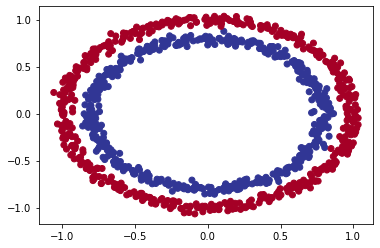

In [102]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);
            

In [ ]:
#check x,y shape for features and labels
X.shape, y.shape


In [104]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [105]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [106]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)


(800, 200, 800, 200)

In [107]:
import torch
from torch import nn

# torch use mps for GPU
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")



Using device: mps


How about we create a model?

We'll want a model capable of handling our X data as inputs and producing something in the shape of our y data as outputs.

In other words, given X (features) we want our model to predict y (label).

This setup where you have features and labels is referred to as supervised learning. Because your data is telling your model what the outputs should be given a certain input.

To create such a model it'll need to handle the input and output shapes of X and y.

Remember how I said input and output shapes are important? Here we'll see why.

Let's create a model class that:

Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).
Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.
Defines a forward() method containing the forward pass computation of the model.
Instantiates the model class and sends it to the target device.

In [108]:
# This class defines a simple neural network model using PyTorch's nn.Module.
# The model is called CircleModelV0 and is intended for a binary classification problem,
# such as classifying data points inside or outside a circle.

# Here's what each part of the code does:

# - The class inherits from nn.Module, which is the base class for all neural network models in PyTorch.
# - In the constructor (__init__), two linear (fully connected) layers are created:
#     - layer_1: This layer takes 2 input features (for example, coordinates X1 and X2) and outputs 5 features. 
#                This means it projects the inputs into a higher dimensional feature space.
#     - layer_2: This layer takes the 5 outputs from layer_1 as input and generates 1 output (suitable for a binary classification label y).
# - The forward() method defines how the data flows through the model:
#     - Input x is passed through layer_1, then its output is passed through layer_2.
#     - The final output can then be compared against ground truth labels for training.

# In pseudocode:
# input (x: shape [batch_size, 2]) -> layer_1 -> layer_2 -> output (shape [batch_size, 1])
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)
    
    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

In [109]:
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [110]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], device='mps:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [111]:
## loss function
loss_fn = nn.BCEWithLogitsLoss(
)

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [112]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [113]:
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], device='mps:0', grad_fn=<SliceBackward0>)

In [114]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

# Create a loss function



tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], device='mps:0', grad_fn=<SigmoidBackward0>)

In [115]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='mps:0')


tensor([0., 0., 0., 0., 0.], device='mps:0', grad_fn=<SqueezeBackward0>)

In [116]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69569, Accuracy: 50.00% | Test loss: 0.69721, Test acc: 50.00%
Epoch: 10 | Loss: 0.69403, Accuracy: 50.00% | Test loss: 0.69615, Test acc: 50.00%
Epoch: 20 | Loss: 0.69343, Accuracy: 46.00% | Test loss: 0.69585, Test acc: 48.50%
Epoch: 30 | Loss: 0.69321, Accuracy: 49.00% | Test loss: 0.69577, Test acc: 47.50%
Epoch: 40 | Loss: 0.69312, Accuracy: 49.50% | Test loss: 0.69573, Test acc: 46.50%
Epoch: 50 | Loss: 0.69308, Accuracy: 50.38% | Test loss: 0.69569, Test acc: 46.50%
Epoch: 60 | Loss: 0.69306, Accuracy: 50.50% | Test loss: 0.69564, Test acc: 46.50%
Epoch: 70 | Loss: 0.69305, Accuracy: 50.50% | Test loss: 0.69559, Test acc: 46.50%
Epoch: 80 | Loss: 0.69304, Accuracy: 50.75% | Test loss: 0.69553, Test acc: 46.50%
Epoch: 90 | Loss: 0.69303, Accuracy: 50.38% | Test loss: 0.69547, Test acc: 46.50%


### Model improvement techniques

| Technique                     | What does it do? |
|-------------------------------|-----------------------------------------------------------------------------------------------------------------------------------|
| **Add more layers**           | Each new layer can learn additional, potentially more complex patterns from the data. Increasing the number of layers makes the model deeper. |
| **Add more hidden units**     | Using more hidden units per layer allows each layer to learn richer representations. Increasing hidden units makes the model wider. |
| **Fitting for longer (more epochs)** | Training the model for more epochs gives it more chances to learn from the data, potentially improving performance. |
| **Changing the activation functions** | Introducing different (especially non-linear) activation functions enables modeling of more complex (non-linear) patterns. |
| **Change the learning rate**  | Adjusts how much the model updates its parameters each step. Too high: model might not learn; too low: model learns too slowly. |
| **Change the loss function**  | Selecting an appropriate loss function for the task is crucial; e.g., binary cross-entropy for binary classification, not multi-class. |
| **Use transfer learning**     | Adapts a model pretrained on a similar problem to your own task, reducing training time and potentially improving results. (Covered in notebook 06.) |

In [117]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
  
  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))
model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [118]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [119]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


In [122]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [123]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression), 
    len(y_train_regression), 
    len(X_test_regression), 
    len(y_test_regression))

80 80 20 20


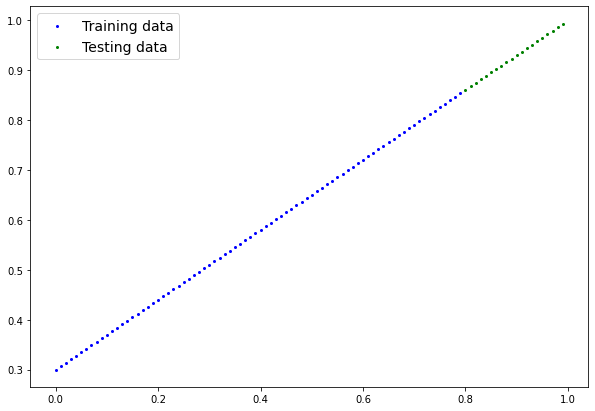

In [124]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);